In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_pickle('clean_Res_latlog.pkl')

In [5]:
clean_df = df.copy()

In [6]:
#removing outliers from GrLivArea & LotArea & TotalBsmtSF
clean_df = clean_df.loc[(clean_df['GrLivArea']<4000) & (clean_df['LotArea']<100000)\
                        & (clean_df['TotalBsmtSF']<3000),:]

# Curb Appeal Feature

In [7]:
clean_df['MasVnrArea'].replace(to_replace=0, value=np.nan, inplace=True)
clean_df['MasVnrArea_bin'] = pd.qcut(clean_df['MasVnrArea'], q=5)
clean_df['MasVnrArea_vals'] = pd.cut(x=clean_df['MasVnrArea'],\
                                 bins=[0.999, 104.0, 169.4, 242.0, 363.6,\
                                       1600], labels=[1,2,3,4,5])

clean_df['LotFrontage'].replace(to_replace=0, value=np.nan, inplace=True)
clean_df['LotFrontage_bin'] = pd.qcut(clean_df['LotFrontage'], q=5)
clean_df['LotFrontage_vals'] = pd.cut(x=clean_df['LotFrontage'],\
                                 bins=[20.999, 52.0, 62.0, 72.0, 82.0,\
                                       313.0], labels=[1,2,3,4,5])

clean_df = clean_df.replace(np.nan, 0)

clean_df = clean_df.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

#clean_df['Street'] = clean_df['Street'].replace({"Grvl":2, "Pave":4})

clean_df['LotShape'] = clean_df['LotShape'].replace({"Reg":1.5, "IR1":3, "IR3":3, "IR2":4.5})

clean_df['LandContour'] = clean_df['LandContour'].replace({"Bnk":1.25, "Lvl":2.5, "Low":3.75, "HLS":5})

clean_df['LotConfig'] = clean_df['LotConfig'].replace({"FR2":1, "Inside":2, "Corner":3, "FR3":4, "CulDSac":5})

clean_df['LandSlope'] = clean_df['LandSlope'].replace({"Gtl":1.5, "Mod":3, "Sev":5})

clean_df['RoofStyle'] = clean_df['RoofStyle'].replace({"Gambrel":1, "Gable":2, "Mansard":3, "Flat":4,"Hip":5, "Shed":5})

clean_df['RoofMatl'] = clean_df['RoofMatl'].replace({"Roll":1, "CompShg":2, "Metal":2, "Tar&Grv":2.5,\
  "WdShake":3, "Membran":4, "WdShngl":5})

clean_df['Exterior1st'] = clean_df['Exterior1st'].replace({"AsphShn":1, "CBlock":1, "AsbShng":2, "Wd Sdng":2.5,\
  "WdShing":2.5, "Stucco":2.5, "MetalSd":3, "BrkComm":3, "HdBoard":3.5,\
  "Plywood":4, "BrkFace":4, "CemntBd":4.5, "VinylSd":4.5, "PreCast":5,\
  "ImStucc":5})

In [8]:
clean_df['curb_appeal']= (clean_df['MasVnrArea_vals'] + clean_df['LotFrontage_vals']\
+ clean_df['LotShape'] + clean_df['LandContour'] + clean_df['LotConfig']\
+ clean_df['LandSlope'] + clean_df['RoofStyle'] + clean_df['RoofMatl'] + clean_df['Exterior1st']\
+ clean_df['ExterQual'] + clean_df['ExterCond'])/11

# Keeping Columns

In [9]:
# 0 'SalePriceLog' ADDing New Column 
clean_df['SalePriceLog'] = np.log10(clean_df['SalePrice'])
clean_df['SalePriceLog'] = clean_df['SalePriceLog'].astype(np.int64)

In [10]:
# ranking neighborhoods by mean sale price

clean_df.Neighborhood_y = clean_df.Neighborhood_y.replace({'MeadowV':1,"Br'Dale":2, 'IDOT&RR':3, 'BrkSide':4, 'OldTown':5, 'Edwards':6, 'S&W ISU':7, 'Sawyer':8, 'NoPkVil':9,\
                'Bluestm':10, 'N Ames':11, 'Mitchel':12, 'SawyerW':13, 'Gilbert':14, 'NW Ames':15, 'Greens':16, 'Blmngtn':17, 'CollgCr':18, 'Crawfor':19,\
                'ClearCr':20, 'Somerst':21, 'Stonebr':22, 'Somerst':23, 'Timber':24, 'Veenker':25, 'NRidgHt':26, 'StoneBr':27,'NoRidge':28, 'HaydnLk':29})

In [11]:
# 6 utilities
# clean_df.Utilities = clean_df.Utilities.replace({'AllPub':1,'NoSewr':0})

# 8 Condition1 - Proximity to various conditions
clean_df.Condition1 = clean_df.Condition1.replace({'Norm':1,'Feedr':0,'Artery':0,'RRAn':0,'RRAe':0,'RRNn':0,'RRNe':0,'PosN':2,'PosA':2})

# 9 Condition2 - Proximity to various conditions (if more than one is present)
clean_df.Condition2 = clean_df.Condition2.replace({'Norm':1,'Feedr':0,'Artery':0,'RRAn':0,'RRAe':0,'RRNn':0,'RRNe':0,'PosN':2,'PosA':2})


# 10 BldgType
clean_df.BldgType = clean_df.BldgType.replace({'2fmCon':1,'Twnhs':2, 'Duplex':3, '1Fam':4, 'TwnhsE':5})

# 11 HouseStyle - CHANGE to binary 0 =ranch, 1 = colonial 
clean_df.HouseStyle = clean_df.HouseStyle.replace({'1.5Unf':0,'1.5Fin':0, 'SFoyer':1, 'SLvl':1, '1Story':0, '2.5Unf':1, '2Story':1, '2.5Fin':1})

# 20 BsmtSF_Fin 
clean_df["BsmtSF_Fin"] =  clean_df['BsmtFinSF1'] + clean_df['BsmtFinSF2']

# 22 CentralAir - changed to binary 

clean_df.CentralAir = clean_df.CentralAir.replace({"Y": 1, "N": 0})

# 23 Electrical - to dumify 
# clean_df['Electrical'] = pd.get_dummies(clean_df['Electrical'])

#25 Bathroom
clean_df['HalfBath2'] = clean_df['HalfBath'].fillna(0.0)*0.5
clean_df['BsmtFullBath2'] = clean_df['BsmtFullBath'].fillna(0.0)*.6 
clean_df['BsmtHalfBath2'] = clean_df['BsmtHalfBath'].fillna(0.0)*.2

clean_df['bathroom'] = clean_df['FullBath'] + clean_df['HalfBath2'] + clean_df['BsmtFullBath2'] + clean_df['BsmtHalfBath2']

# 30 GarageType

clean_df["GarageType"] = clean_df.GarageType.apply(lambda x: 0 if x == 'Attchd' else(1))

# 31 Garage Finish
clean_df.GarageFinish.fillna(0, inplace=True)
clean_df.GarageFinish = clean_df.GarageFinish.replace({'Unf':0,'RFn':1, 'Fin':1})

#34 PorchTotSF
clean_df['GrPorchArea']=clean_df['OpenPorchSF']+clean_df['EnclosedPorch']+clean_df['3SsnPorch'] + clean_df['ScreenPorch']

# 35 HasPorch
clean_df['HasPorch']=clean_df.GrPorchArea.apply(lambda x: 1 if x>0 else(0))

# 36 HasDeck 
clean_df['HasDeck']=clean_df.WoodDeckSF.apply(lambda x: 1 if x>0 else(0))

# 37 HasPool
clean_df['Pool_YN']=clean_df.PoolArea.apply(lambda x: 1 if x>0 else(0))

# 38 Fence 
clean_df.Fence.fillna(0, inplace=True)
clean_df.Fence = clean_df.Fence.replace({'MnWw':1,'GdWo':2, 'MnPrv':3, 'GdPrv':4})

# 39 MoSold

# 40 HasGarage 
clean_df['GarageCars'] = clean_df.GarageCars.apply(lambda x: 1 if x>0 else(0))

# 41 HasFinBsmt
clean_df['BsmtSF_Fin'] = clean_df.BsmtSF_Fin.apply(lambda x: 1 if x>0 else(0))


# 42 BeenRemod
clean_df['BeenRemod'] = np.where(clean_df.YearRemodAdd != clean_df.YearBuilt, 1, 0)

# 43 shed
clean_df['Shed'] = clean_df.MiscFeature=='Shed'
clean_df.Shed = clean_df.Shed.astype(int)

# 44 Gar2
clean_df['Gar2'] = clean_df.MiscFeature=='Gar2'
clean_df.Gar2 = clean_df.Gar2.astype(int)

clean_df.drop(columns='MiscFeature', inplace=True)

# 45 Log-Lat
#clean_df["address_lat_log"] = address_lat_log

# 46 Distance to Highschool
#clean_df['highschool_dist'] = highschool_dist

# 47 Distance to College
#clean_df['college_dist'] = college_dist

# 48 Latitude

# 49 Longitude

# separate tuple to two columns
#clean_df[['latitude', 'longitude']] = pd.DataFrame(clean_df["address_lat_log"].tolist(), index = clean_df.index)

# Dropped Columns

In [12]:
#clean_df.drop(columns='GarageYrBlt', inplace=True)

# # 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'
# clean_df.drop(columns = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True)

# #drop Bathroom ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
# clean_df.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'],inplace=True)

# #drop Basement columns ['BsmtFinSF1', 'BsmtFinSF2']
# clean_df.drop(columns = ['BsmtFinSF1', 'BsmtFinSF2'],inplace=True)

# # PoolArea
# clean_df.drop(columns='PoolArea',inplace=True)

#dropping extra columns
clean_df.drop(columns=["MSSubClass", "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "RoofStyle", "RoofMatl", \
"Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", "YearRemodAdd", "Foundation", "BsmtExposure", "BsmtFinType1", \
"BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "Heating", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "BsmtFullBath", \
"BsmtHalfBath", "FullBath", "HalfBath", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "GarageYrBlt", "GarageCond", \
"PavedDrive", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "PoolQC", \
"MiscVal", "SaleType", "SaleCondition", "YrSold", 'PID','MSZoning', 'Neighborhood_x', 'GarageArea', 'ClassPr_S', 'SchD_S', 'TxD_S',\
'address_lat_log', 'Prop_Addr', 'GeoRefNo', "Functional", \
'MasVnrArea_bin','MasVnrArea_vals', "LotFrontage_bin", \
"LotFrontage_vals",'Utilities','Electrical','Pool_YN','LotFrontage','latitude','longitude', \
                       'HalfBath2','BeenRemod','GarageCars','BsmtHalfBath2','Condition2','Gar2', \
                      'Fence','HasDeck','Shed','ExterQual','ExterCond','FireplaceQu','BsmtQual'],inplace=True)

# Tree Based Models

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [14]:
X = clean_df.drop(labels=['SalePrice', 'SalePriceLog'], axis=1)
y = clean_df['SalePrice']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((1784, 27), (765, 27))

# Gradient Boost

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [21]:
gbm = GradientBoostingRegressor()

gbm.set_params(n_estimators = 464, 
            learning_rate = .1, #.3,
            max_depth = 2, #2,
            min_samples_leaf = 3)

gbm.fit(X_train,y_train)

print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,y_test)))

--------------------------------------------------
The train set R^2 is 0.971
The test set R^2 is 0.911


### Grid Search for Gradient Boost

In [22]:
# n_estimator: 

x = np.logspace(1, 4, 100)
x = x.astype(np.int64)

In [23]:
param_grid={'n_estimators':x,
           'learning_rate': [.3,.2,0.1],
            'max_depth':[1,2,3],
            'min_samples_leaf':[3]}

grid_search = GridSearchCV(estimator= gbm, param_grid= param_grid)
grid_search.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [36]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=657,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 657}
0.9269621506256469


In [39]:
gbm.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=464,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

### Gradient Boost - Feature Importance

In [40]:
sorted(zip(X.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)

[('OverallQual', 0.4389192280487292),
 ('GrLivArea', 0.17953360849157432),
 ('TotalBsmtSF', 0.10712027478719408),
 ('Neighborhood_y', 0.08229477511196463),
 ('bathroom', 0.0589139550028226),
 ('curb_appeal', 0.040145952973039176),
 ('YearBuilt', 0.01757444204731522),
 ('Fireplaces', 0.015344696716395587),
 ('LotArea', 0.014999773019229978),
 ('OverallCond', 0.009150602029396071),
 ('HeatingQC', 0.005255152475128848),
 ('CentralAir', 0.004067526474487702),
 ('GarageFinish', 0.003519373525259385),
 ('GrPorchArea', 0.00312212257381454),
 ('BsmtFullBath2', 0.0030554909617427394),
 ('BsmtSF_Fin', 0.0029688290003046726),
 ('GarageType', 0.002921079663596801),
 ('college_dist', 0.0026946448449021816),
 ('BldgType', 0.0018312869770155025),
 ('highschool_dist', 0.0015560530265993874),
 ('BedroomAbvGr', 0.0015115584299725672),
 ('Condition1', 0.0010311354127143576),
 ('GarageQual', 0.0008291590298893874),
 ('BsmtCond', 0.0006970351726769624),
 ('MoSold', 0.0005700966720754221),
 ('HouseStyle', 0

In [77]:
# creating a dataframe of the top 12 features in feature importance and graphing the features

d = {'Features': ['Overall Quality', 'GrLivArea', 'TotalBsmtSF','Neighborhood','Total Bathrooms','Curb Appeal', \
                 'YearBuilt','Fireplaces','LotArea','Overall Condition','HeatingQC','Central Air'], \
     'Scores': [0.4389, 0.1795,0.1071,0.0822,0.0589,0.0401,0.0175,0.0153,0.0149,0.0091,0.0052,0.0040]}
important_features = pd.DataFrame(data=d)

In [80]:
important_features = important_features.rename(columns={'Scores': "Coefficients"})

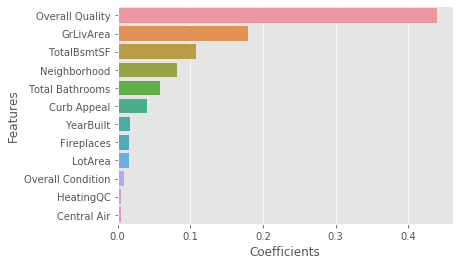

In [81]:
sns.barplot(x='Coefficients', y='Features', data=important_features)

### Gradient Boost - Plotting Residuals

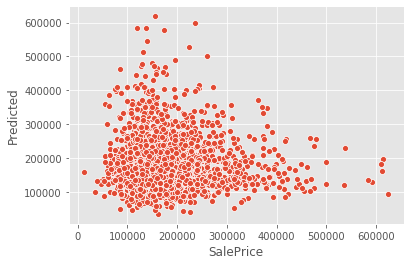

In [75]:
# plotting the actual values vs. the predicted values

gbm_predicted = pd.DataFrame(gbm.predict(X))
gbm_predicted = gbm_predicted.rename(columns={0: "Predicted"})
gbm_predicted_actual = pd.concat([gbm_predicted, g], axis=1, sort=False)
sns.scatterplot(x=gbm_predicted_actual['SalePrice'], y=gbm_predicted_actual['Predicted'], data=gbm_predicted_actual)

In [24]:
# plotting the actual values vs. absolute residuals 

gbm_residuals = pd.DataFrame(y - gbm.predict(X))

In [26]:
gbm_residuals = gbm_residuals.rename(columns={"SalePrice": "Residual Values"})

In [27]:
f = clean_df[['SalePrice']]

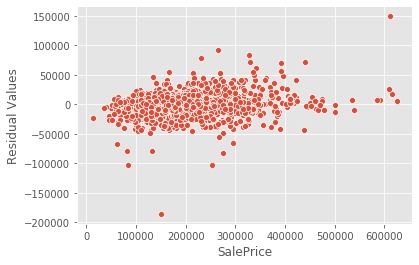

In [28]:
gbm_resid = pd.concat([gbm_residuals, f], axis=1, sort=False)
sns.scatterplot(x=gbm_resid['SalePrice'], y=gbm_resid['Residual Values'], data=gbm_resid).set_title \
('Gradient Boost Residuals Plot')

# XG Boost

In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [20]:
model1 = XGBRegressor()
model1.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:08:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [21]:
print("The train set R^2 is %.3f" %(model1.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(model1.score(X_test,y_test)))

The train set R^2 is 0.963
The test set R^2 is 0.901


In [22]:
model1.get_booster().get_score(importance_type="gain")

{'OverallQual': 661193694368.1052,
 'bathroom': 156458537151.81818,
 'GrLivArea': 46569725013.413536,
 'TotalBsmtSF': 89616530227.7255,
 'Neighborhood_y': 116110801531.15,
 'LotArea': 18297542984.95238,
 'curb_appeal': 50483012761.73913,
 'Fireplaces': 34415127111.0,
 'HeatingQC': 18937629276.363636,
 'BsmtFullBath2': 10002029787.058823,
 'CentralAir': 45986840600.0,
 'OverallCond': 9028290642.941177,
 'GarageFinish': 91631255600.0,
 'YearBuilt': 9445230139.017544,
 'BsmtSF_Fin': 8291986376.933333,
 'GarageQual': 4831767877.111111,
 'highschool_dist': 2413787123.6,
 'BldgType': 11845900800.0,
 'GrPorchArea': 5579156655.3,
 'GarageType': 3277367963.2,
 'BedroomAbvGr': 5340262573.166667,
 'Condition1': 5498292102.727273,
 'college_dist': 2577505990.0869565,
 'BsmtCond': 2829788544.0,
 'MoSold': 1543560794.0,
 'HouseStyle': 2196091902.8}

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

In [31]:
rf = RandomForestRegressor(random_state = 999)

In [32]:
from sklearn import ensemble

randomForest1 = ensemble.RandomForestRegressor()
bagging = ensemble.BaggingClassifier()

randomForest1.set_params(random_state=42, n_estimators=464, max_features=4, min_samples_split=8)

print(randomForest1.fit(X_train,y_train))

print(randomForest1.score(X_train,y_train))
randomForest1.score(X_test,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=464,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
0.9679661981290889


0.8956595520067014

### Random Forest - Residuals Plot

In [33]:
residuals = pd.DataFrame(y - randomForest1.predict(X))

In [34]:
predicted = pd.DataFrame(randomForest1.predict(X))

In [35]:
predicted = predicted.rename(columns={0: "Predicted"})

In [36]:
residuals = residuals.rename(columns={"SalePrice": "Residual Values"})

In [37]:
g = clean_df[['SalePrice']]

In [38]:
resid_actual = pd.concat([residuals, g], axis=1, sort=False)
resid_actual

,Residual Values,SalePrice
0,3401.867531,126000
1,-8107.500264,139500
4,2564.512528,114000
5,6165.139440,227000
6,-3616.782160,198500
...,...,...
2619,6869.844973,121000
2620,503.991114,139600
2621,-397.455074,145000
2622,-2202.084268,217500


Text(0.5, 1.0, 'Random Forest Residuals Plot')

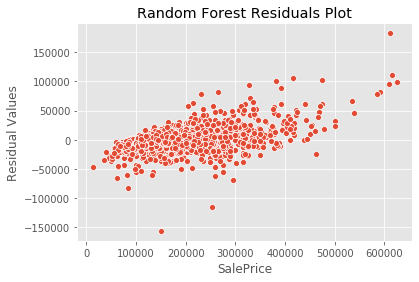

In [39]:
# absolute residual values vs sale price graph

sns.scatterplot(x=resid_actual['SalePrice'], y=resid_actual['Residual Values'], data=resid_actual).set_title \
('Random Forest Residuals Plot')

In [69]:
predicted_actual = pd.concat([predicted, g], axis=1, sort=False)

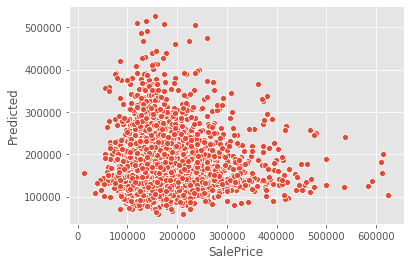

In [70]:
# predicted vs. actual sale price values plot 

sns.scatterplot(x=predicted_actual['SalePrice'], y=predicted_actual['Predicted'], data=predicted_actual)

# Graphviz - Getting Image of Decision Tree from Random Forest

In [26]:
from sklearn import tree

In [27]:
from sklearn.tree import export_graphviz

In [28]:
estimator = randomForest1.estimators_[5]

In [30]:
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = 'SalePrice',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [31]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

# Extra Trees Classifier

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.07128124 0.06833951 0.01595469 0.0158494  0.01459652 0.0425114
 0.03638512 0.06480214 0.01380929 0.06602914 0.03239833 0.00503488
 0.03172865 0.02790386 0.01348505 0.0093108  0.012217   0.06719736
 0.04729708 0.06745398 0.06625185 0.06827356 0.01666457 0.01787836
 0.04066662 0.05111081 0.01556881]


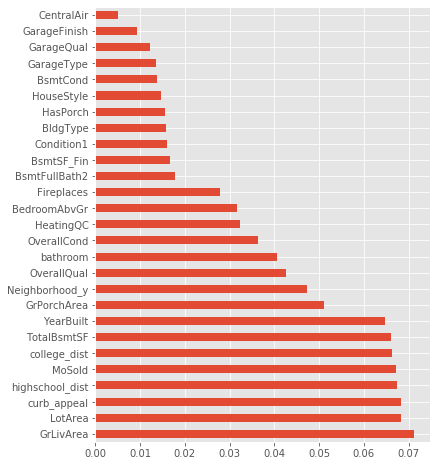

In [33]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model2 = ExtraTreesClassifier()
model2.fit(X,y)
print(model2.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances.nlargest(55).plot(kind='barh', figsize=(6,8))
plt.show()

In [17]:
clean_df.to_pickle('./data/clean_df.pkl')